In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
df_train = pd.read_csv("/content/train_Sleep_health_and_lifestyle_dataset.csv")
df_val = pd.read_csv("/content/val_Sleep_health_and_lifestyle_dataset.csv")
df_test = pd.read_csv("/content/test_Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
X_train = df_train.drop(columns=["Quality of Sleep"])
y_train = df_train["Quality of Sleep"]

X_val = df_val.drop(columns=["Quality of Sleep"])
y_val = df_val["Quality of Sleep"]

X_test = df_test.drop(columns=["Quality of Sleep"])
y_test = df_test["Quality of Sleep"]

In [ ]:
model = SVC()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)

grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
                         'kernel': ['rbf']})

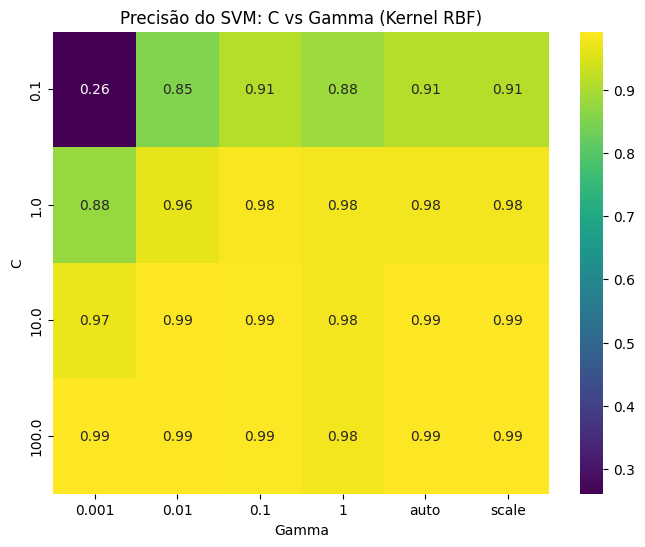

In [ ]:
results_df = pd.DataFrame(grid.cv_results_)
rbf_results = results_df[results_df['param_kernel'] == 'rbf']
viz_data = rbf_results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(viz_data, annot=True, cmap='viridis')
plt.title('Precisão do SVM: C vs Gamma (Kernel RBF)')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

In [ ]:
train_acc = grid.best_score_

y_pred_val = grid.predict(X_val_scaled)
val_acc = metrics.accuracy_score(y_val, y_pred_val)

print(f"Acurácia no Treino (CV): {train_acc}")
print(f"Acurácia na Validação: {val_acc}")

Acurácia no Treino (CV): 0.9915823956701324
Acurácia na Validação: 0.9642857142857143


In [ ]:
y_pred_test = grid.predict(X_test_scaled)
test_acc = metrics.accuracy_score(y_test, y_pred_test)

print(f"Acurácia Final: {test_acc}")

Acurácia Final: 0.9473684210526315


In [ ]:
r2 = metrics.r2_score(y_test, y_pred_test)
mae = metrics.mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)) # Corrigido aqui
medae = metrics.median_absolute_error(y_test, y_pred_test)     # Corrigido aqui

print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MedAE: {medae}")

R²: 0.88958243650452
MAE: 0.08771929824561403
RMSE: 0.39735970711951313
MedAE: 0.0


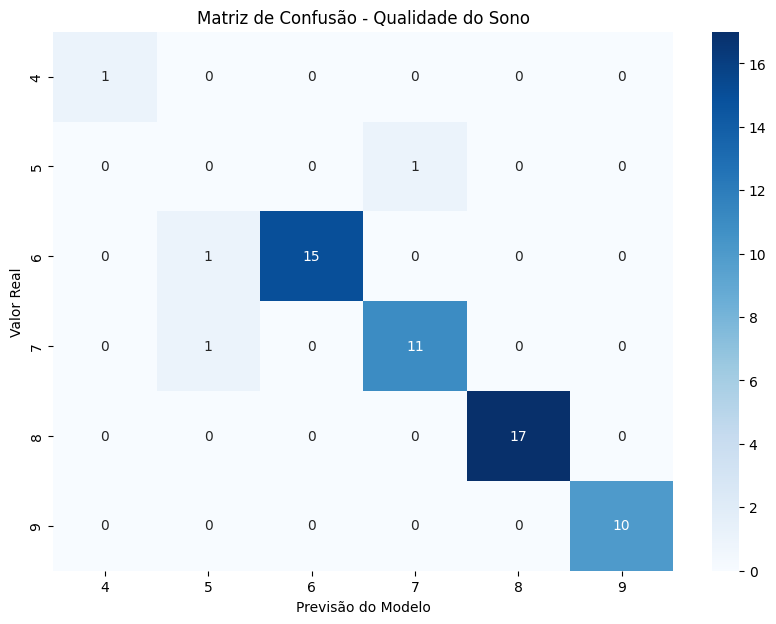

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_test)

# 2. Plotar o gráfico
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))

plt.title('Matriz de Confusão - Qualidade do Sono')
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.show()

In [ ]:
joblib.dump(grid.best_estimator_, 'modelo_svm_sono.joblib')
joblib.dump(scaler, 'scaler_sono.joblib')

['scaler_sono.joblib']